In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df = pd.read_csv('mnist_train.csv')

In [7]:
# 19999 rows, 785 columns
df.shape

(42000, 785)

Each digit is a grayscale image  
28x28 pixels, and one channel => 784 columns if we flatten it out.

In [8]:
df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [9]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [50]:
data = df.values
np.random.shuffle(data)

In [51]:
print(data)

[[6 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 ...
 [3 0 0 ... 0 0 0]
 [7 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]]


In [52]:
print(type(data))

<class 'numpy.ndarray'>


In [53]:
print(data.shape)

(42000, 785)


Seperate X and Y (label) values

In [54]:
X = data[:, 1:]
Y = data[:, 0]

In [55]:
print(X) # Each row denotes one image

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [56]:
print(Y)

[6 0 2 ... 3 7 9]


In [57]:
print(X.shape, Y.shape)

(42000, 784) (42000,)


## Visualise one image

In [58]:
X[0].shape

(784,)

In [59]:
def drawImg(X, Y, i) :
    plt.imshow(X[i].reshape(28, 28), cmap = 'gray')
    plt.title("Label " + str(Y[i]))
    plt.show()

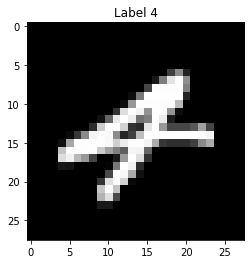

In [60]:
drawImg(X, Y, 10)

Separate data for training and testing

In [61]:
split = int(0.80 * X.shape[0])
print(split)

33600


In [62]:
X_train, Y_train = X[:split, :], Y[:split]

In [63]:
X_test, Y_test = X[split:, :], Y[split:]

In [64]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(33600, 784) (33600,)
(8400, 784) (8400,)


## Randomise a array (rows of a matrix)

When the data set is not random, the training may not be accurate.

In [65]:
a = np.array([1, 2, 3, 4, 5])
np.random.shuffle(a)
print(a)

[5 2 3 4 1]


In [66]:
b = np.array([[1, 2, 3], 
              [4, 5, 6], 
              [7, 8, 9], 
              [10, 11, 12]])
np.random.shuffle(b)
print(b)

[[ 7  8  9]
 [ 4  5  6]
 [10 11 12]
 [ 1  2  3]]


In [67]:
# Try to plot a visualisation (Grid of first 25 images 5 x 5)

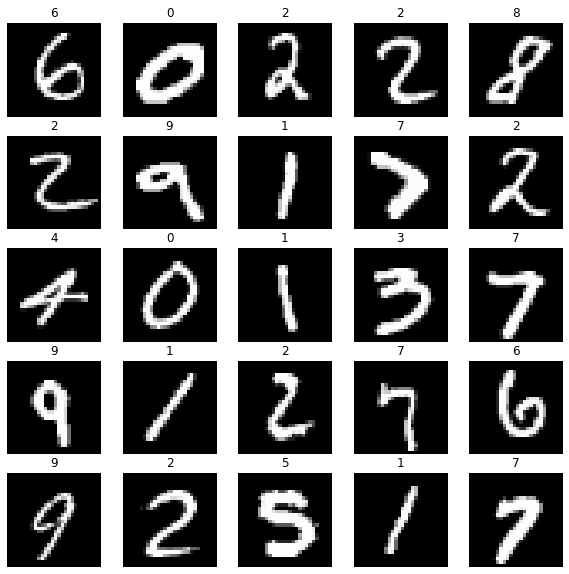

In [79]:
plt.figure(figsize = (10, 10))
for i in range(25) :
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap = 'gray')
    plt.title(str(Y_train[i]))
    plt.axis("off")
plt.show()

## Instead of splitting the data ourselves into test and train, we can use sklearn

In [81]:
from sklearn.model_selection import train_test_split

In [86]:
# Does random shuffling every time

XT, Xt, YT, Yt = train_test_split(X, Y, test_size = 0.2)

In [87]:
print(XT.shape, YT.shape)
print(Xt.shape, Yt.shape)

(33600, 784) (33600,)
(8400, 784) (8400,)


In [90]:
# Random_state is like seed value, gives consistent set of data over multiple executions

XT, Xt, YT, Yt = train_test_split(X, Y, test_size = 0.2, random_state = 5)